<a href="https://colab.research.google.com/github/sanahashmat/Image-Video-processing/blob/main/color_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

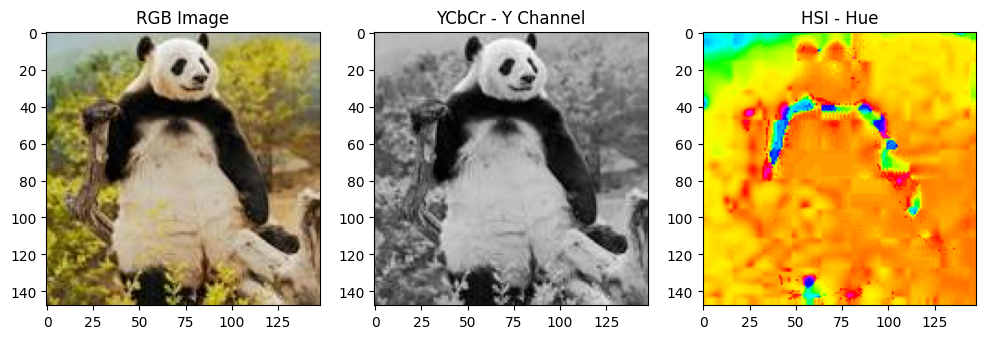

In [1]:
# Program 8: Color Space Conversion
# Objective: Convert RGB image to YCbCr and HSI color models

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load RGB image
img = cv2.imread('/content/panda.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to YCbCr
ycbcr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)

# Convert to HSI manually
img_norm = img_rgb / 255.0
R, G, B = img_norm[:,:,0], img_norm[:,:,1], img_norm[:,:,2]

num = 0.5 * ((R-G)+(R-B))
den = np.sqrt((R-G)**2 + (R-B)*(G-B))
theta = np.arccos(num/(den+1e-6))

H = np.where(B <= G, theta, 2*np.pi-theta)
H = H / (2*np.pi)
S = 1 - (3/(R+G+B+1e-6))*np.minimum(np.minimum(R,G),B)
I = (R+G+B)/3

# Display results
plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(img_rgb), plt.title("RGB Image")
plt.subplot(1,3,2), plt.imshow(ycbcr[:,:,0], cmap='gray'), plt.title("YCbCr - Y Channel")
plt.subplot(1,3,3), plt.imshow(H, cmap='hsv'), plt.title("HSI - Hue")
plt.show()
